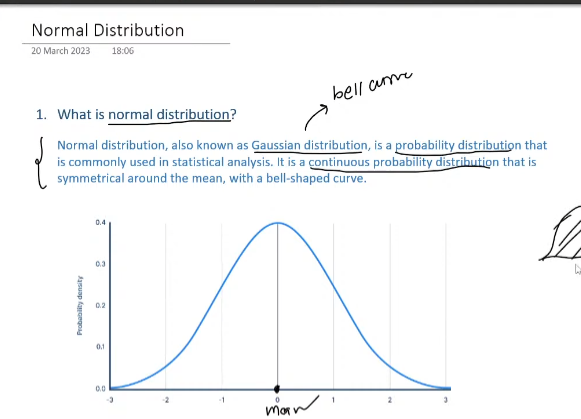

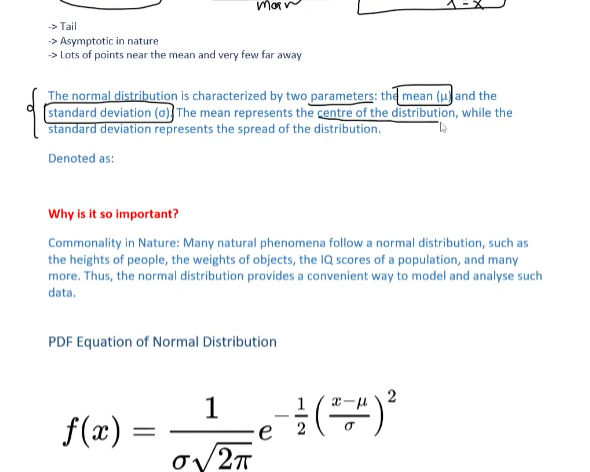

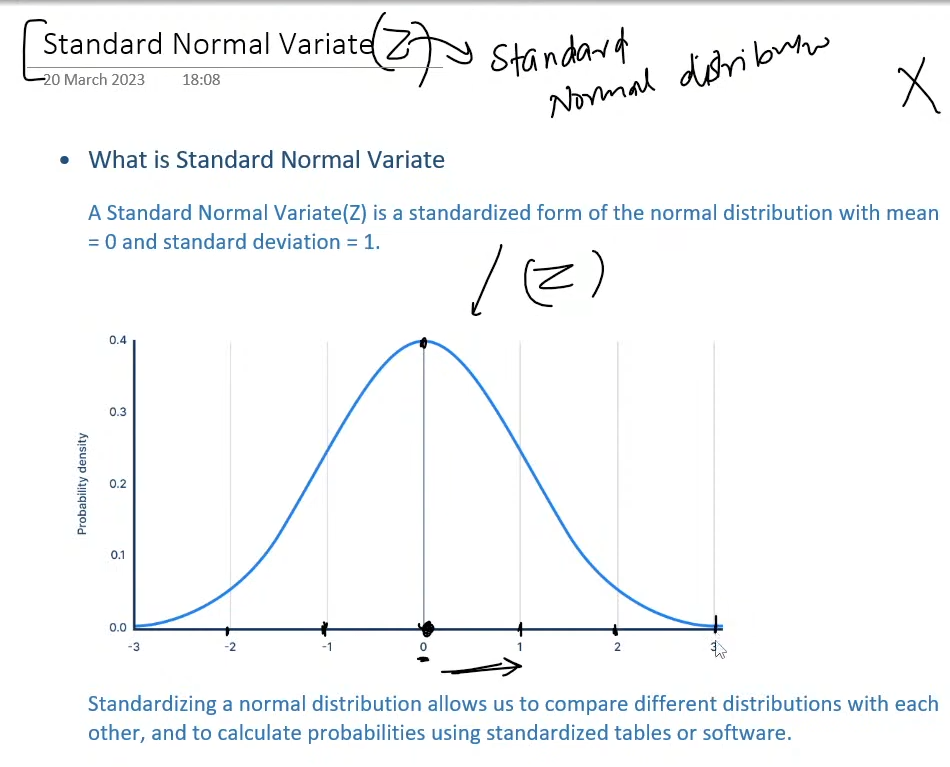

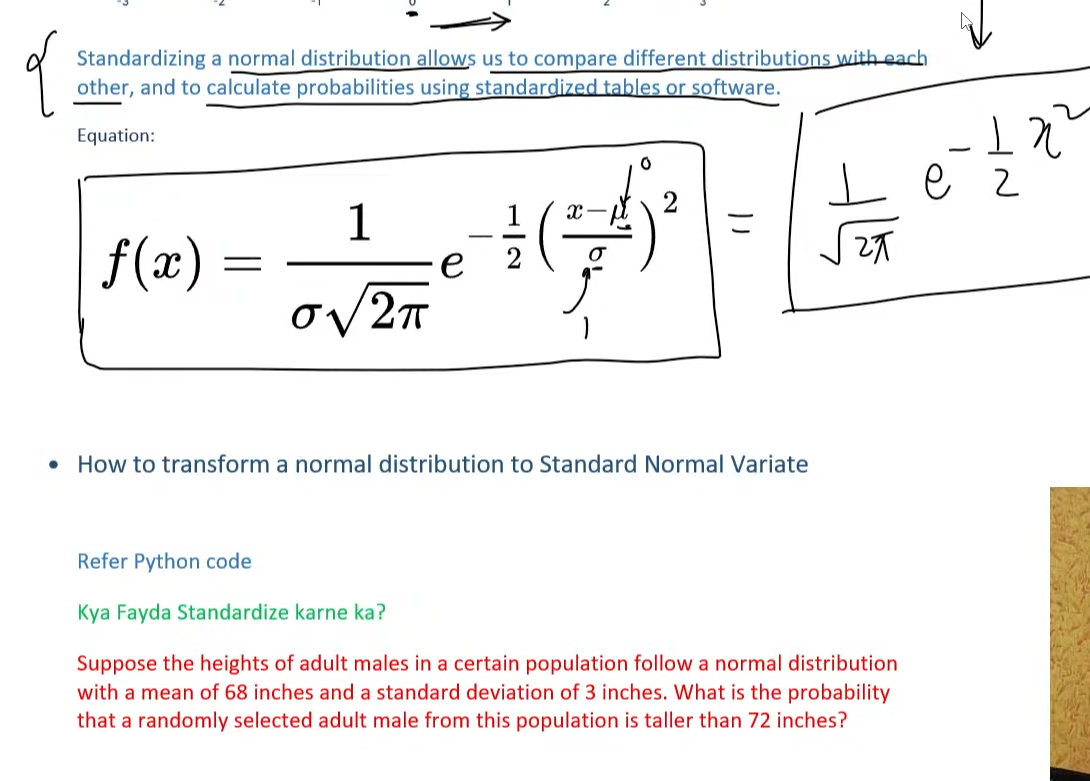

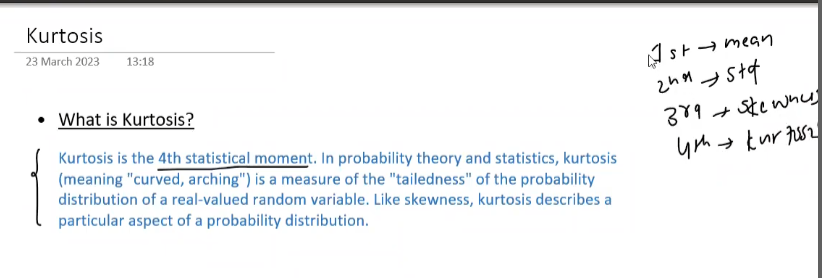

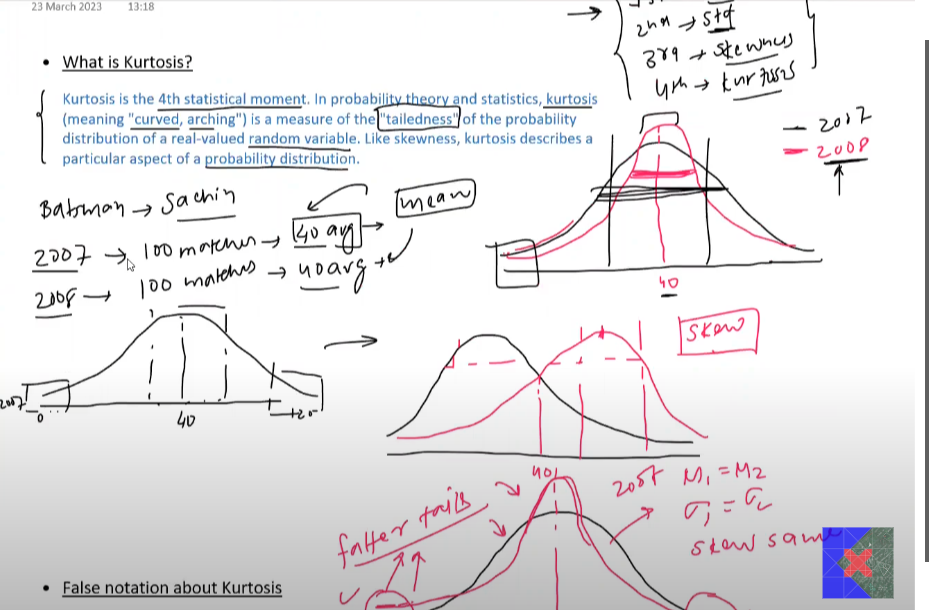

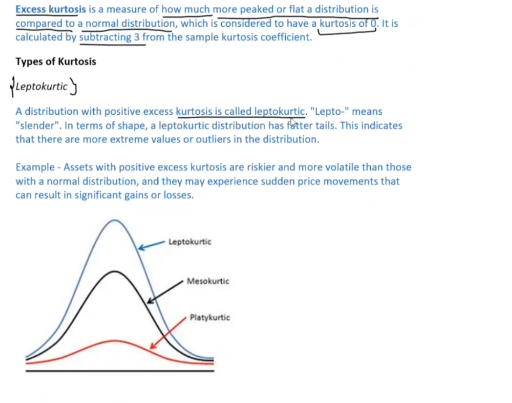

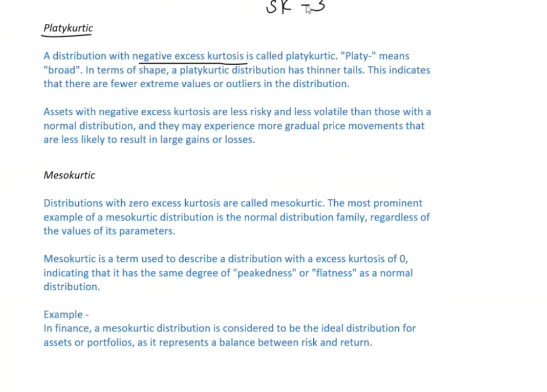

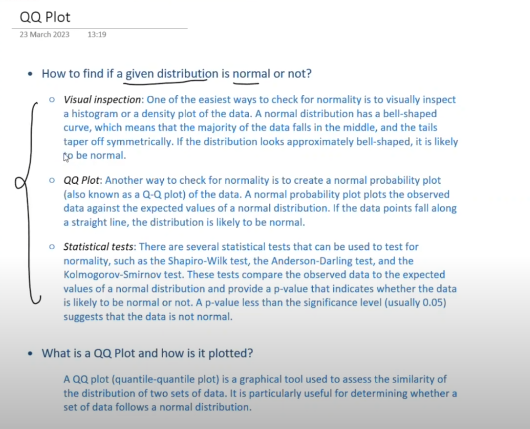

# q-q plot ; quaintile quantile plot

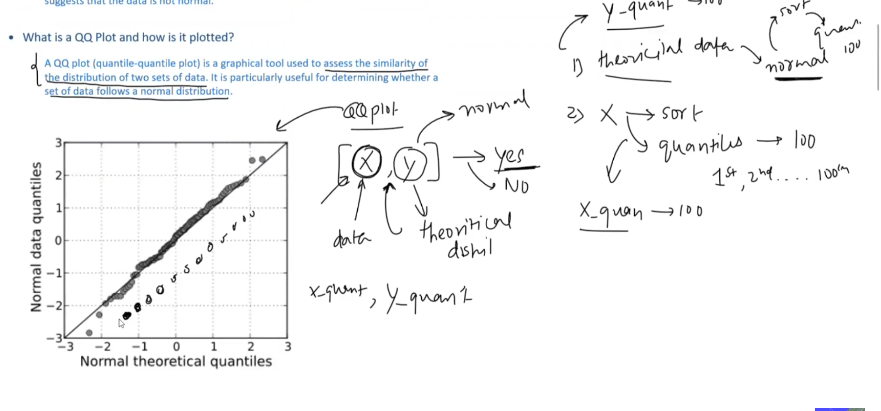

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from numpy.random import normal
file_name = r"D:\Brainwired\FarmTestDataClean\live_label_merge_data\FinalMergedData28Hz_LiveLable.csv"

live_label_data = pd.read_csv(file_name)
live_label_data['tag']= 5
live_label_data.reset_index(drop=True,inplace=True)
print(live_label_data.shape)
print(live_label_data.date.unique())

(516880, 8)
['2024-07-03' '2024-07-04']


<Axes: xlabel='x', ylabel='Density'>

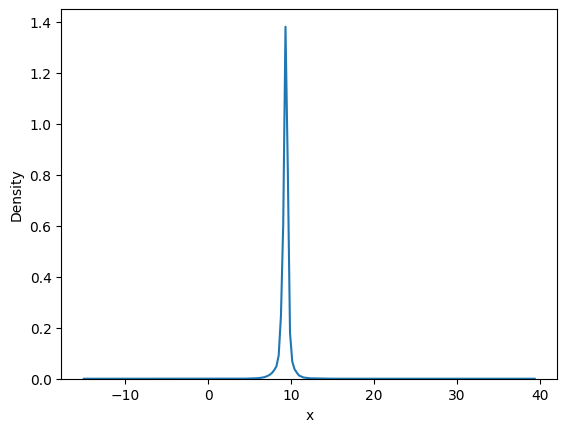

In [2]:
sns.kdeplot(live_label_data['x'])

<Axes: >

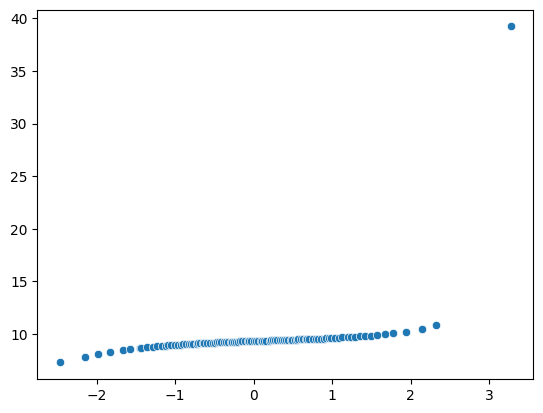

In [4]:
temp = sorted(live_label_data['x'].tolist())
y_quant = []

for i in range(1,101):
  y_quant.append(np.percentile(temp,i))


samples = np.random.normal(loc=0,scale=1,size=1000) # therotical data

x_quant = []

for i in range(1,101):
  x_quant.append(np.percentile(samples,i))

sns.scatterplot(x=x_quant,y=y_quant)

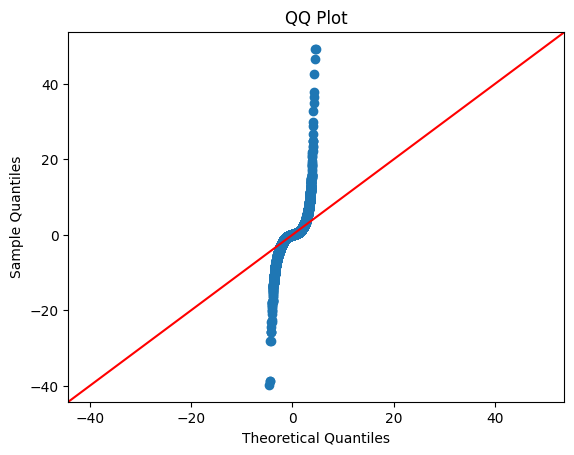

In [9]:


import statsmodels.api as sm
import matplotlib.pyplot as plt

# Create a QQ plot of the two sets of data
fig = sm.qqplot(live_label_data['x'], line='45', fit=True)

# Add a title and labels to the plot
plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Show the plot
plt.show()


In [10]:
# this graph shows the your data is extremely peaked

# log Transformation

The log transformation is not suitable for zero or negative values.

In [15]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

# Assume 'data' is your original data as a pandas Series
data = live_label_data['x'].astype(float)  # Replace with your original data

# Print the first few rows of the data to debug
print("Original Data:")
print(data.head())

# Remove non-finite values
data_cleaned = data.replace([np.inf, -np.inf], np.nan).dropna()

# Print the first few rows of the cleaned data to debug
print("Cleaned Data:")
print(data_cleaned.head())

# Apply log transformation
data_log_transformed = np.log(data_cleaned + 1)

# Print the first few rows of the log-transformed data to debug
print("Log Transformed Data:")
print(data_log_transformed.head())

# Check for any remaining non-finite values
print("Any non-finite values in transformed data:", not np.isfinite(data_log_transformed).all())

# Create a QQ plot of the log-transformed data
fig = sm.qqplot(data_log_transformed, line='45', fit=True)

# Add a title and labels to the plot
plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Show the plot
plt.show()


Original Data:
0    9.0024
1    8.9258
2    8.9066
3    8.9641
4    8.9449
Name: x, dtype: float64
Cleaned Data:
0    9.0024
1    8.9258
2    8.9066
3    8.9641
4    8.9449
Name: x, dtype: float64
Log Transformed Data:
0    2.302825
1    2.295137
2    2.293201
3    2.298989
4    2.297060
Name: x, dtype: float64
Any non-finite values in transformed data: True


c:\Users\BW_ML_1\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: The data contains non-finite values.

In [17]:
# Apply square root transformation
data_sqrt_transformed = np.sqrt(live_label_data['x'])


fig = sm.qqplot(data_sqrt_transformed, line='45', fit=True)

# Add a title and labels to the plot
plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Show the plot
plt.show()

ValueError: The data contains non-finite values.

0         9.0024
1         8.9258
2         8.9066
3         8.9641
4         8.9449
           ...  
516875    8.9258
516876    8.6768
516877    9.2514
516878    9.6345
516879    9.5962
Name: x, Length: 516880, dtype: float64

In [20]:
from scipy import stats

# Apply Box-Cox transformation (data must be positive)
data_boxcox_transformed, _ = stats.boxcox(live_label_data['x'] + 1)  # Adding 1 to ensure positivity

# Print transformed data
print("Box-Cox Transformed Data:")
print(data_boxcox_transformed)


ValueError: Data must be positive.

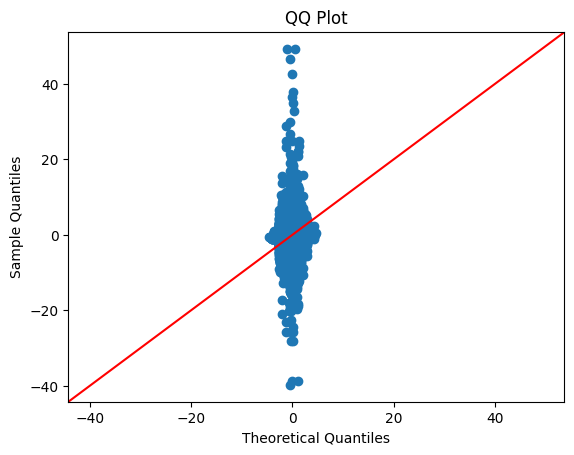

In [23]:
from sklearn.preprocessing import StandardScaler


# Apply z-score standardization
scaler = StandardScaler()
data_zscore_transformed = scaler.fit_transform(live_label_data[['x']])

fig = sm.qqplot(data_zscore_transformed ,line='45', fit=True)

# Add a title and labels to the plot
plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Show the plot
plt.show()


In [10]:
mean_ = live_label_data['x'].mean() 
std_ = live_label_data['x'].std()

pos = mean_+3*std_
neg = mean_-3*std_


live_label_data[~((live_label_data['x'] >= neg) & (live_label_data['x'] <= pos))]


x       y       z             sys_time        date primary  \
2235    11.9904 -7.2977 -1.9346  2024-07-03 11:13:21  2024-07-03   STAND   
2236    11.7797 -6.0335 -2.8156  2024-07-03 11:13:21  2024-07-03   STAND   
2237    11.4541 -7.0487 -1.3982  2024-07-03 11:13:21  2024-07-03   STAND   
2238    13.2163 -9.3088 -5.0567  2024-07-03 11:13:21  2024-07-03   STAND   
2241     6.1101 -6.9721 -1.7047  2024-07-03 11:13:21  2024-07-03   STAND   
...         ...     ...     ...                  ...         ...     ...   
515670  11.2434 -4.2330 -0.0766  2024-07-04 16:45:47  2024-07-04   STAND   
515671  11.8180 -3.1604 -0.4597  2024-07-04 16:45:47  2024-07-04   STAND   
515672   6.6081 -1.5132 -2.5858  2024-07-04 16:45:47  2024-07-04   STAND   
515673   5.8994 -0.2298  0.0000  2024-07-04 16:45:47  2024-07-04   STAND   
516002  11.3009  1.8005 -1.9920  2024-07-04 16:46:52  2024-07-04   STAND   

       secondary  tag  
2235        IDLE    5  
2236        IDLE    5  
2237        IDLE    5  
2238        IDLE    5  
2241        IDLE    5  
...          ...  ...  
515670      IDLE    5  
515671      IDLE    5  
515672      IDLE    5  
515673      IDLE    5  
516002      IDLE    5  

[10225 rows x 8 columns]

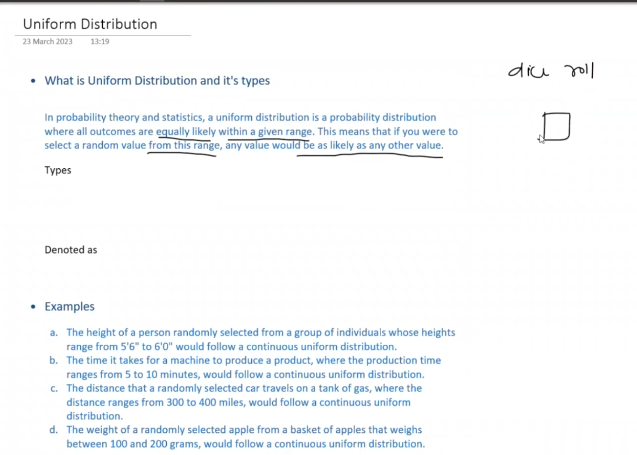

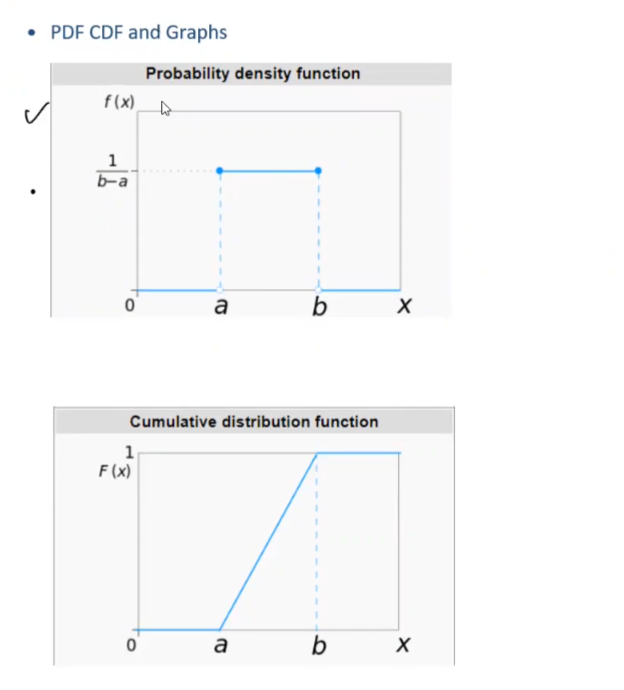

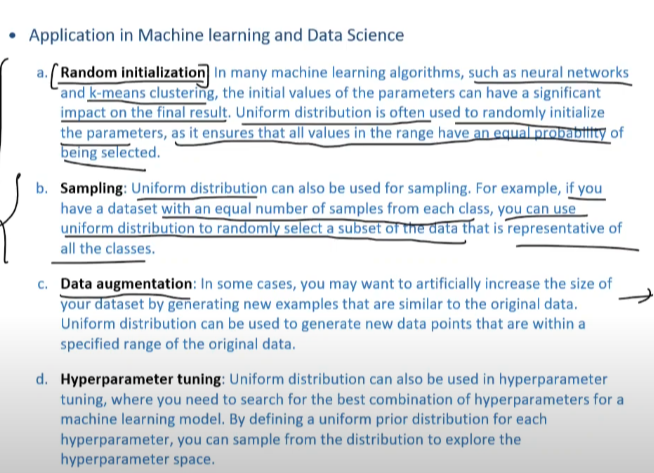

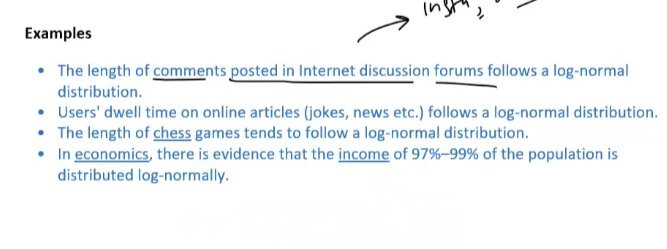

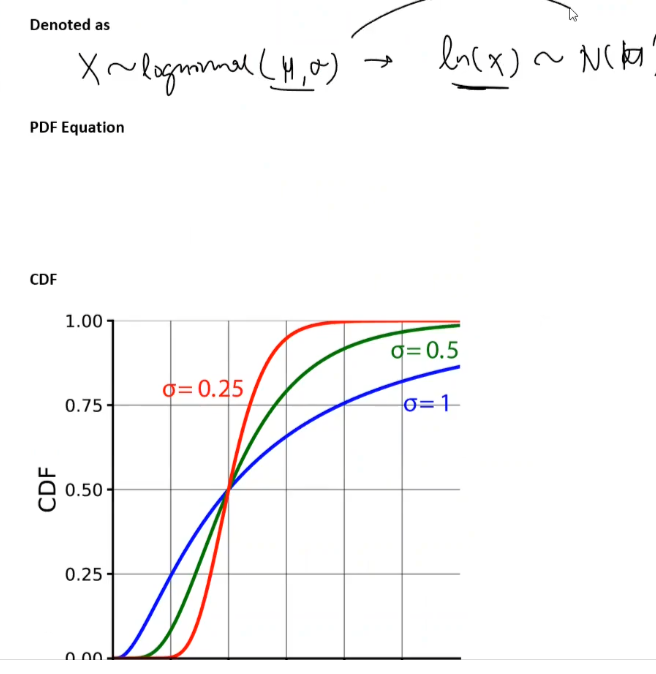

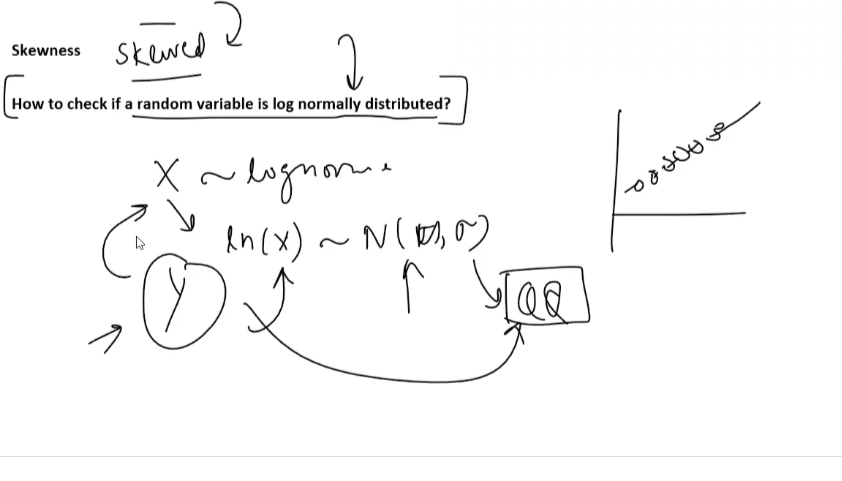


how to know your data follow the log distribution 

first data should be right skewed and the log(x)  should follow the normal distribution then we can say that the your data follow the log distribution

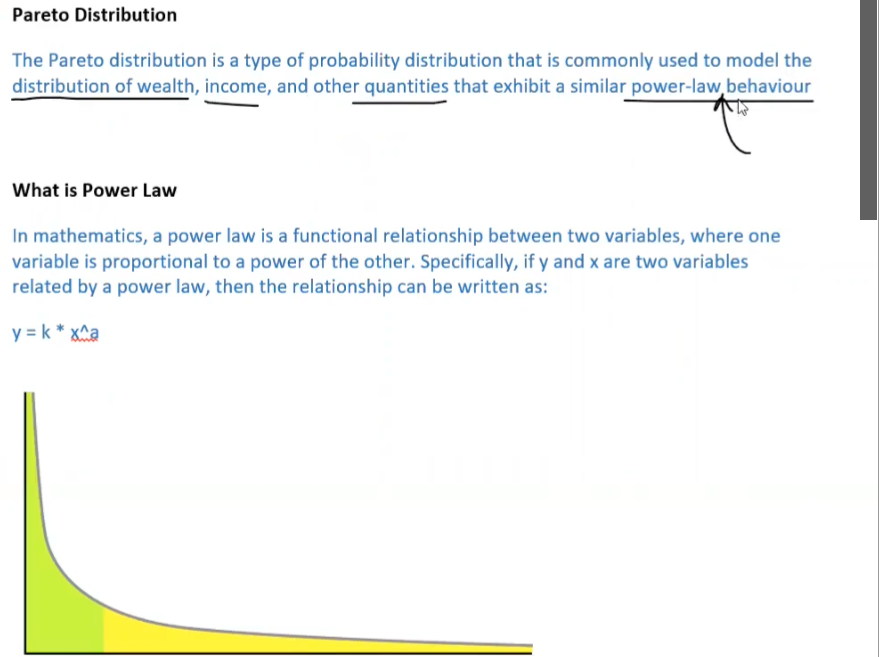
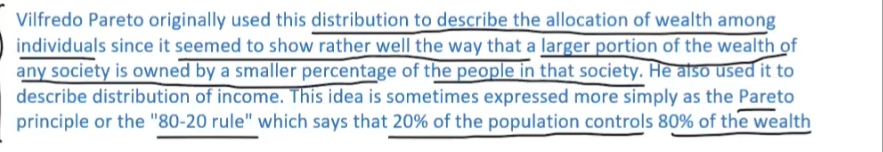
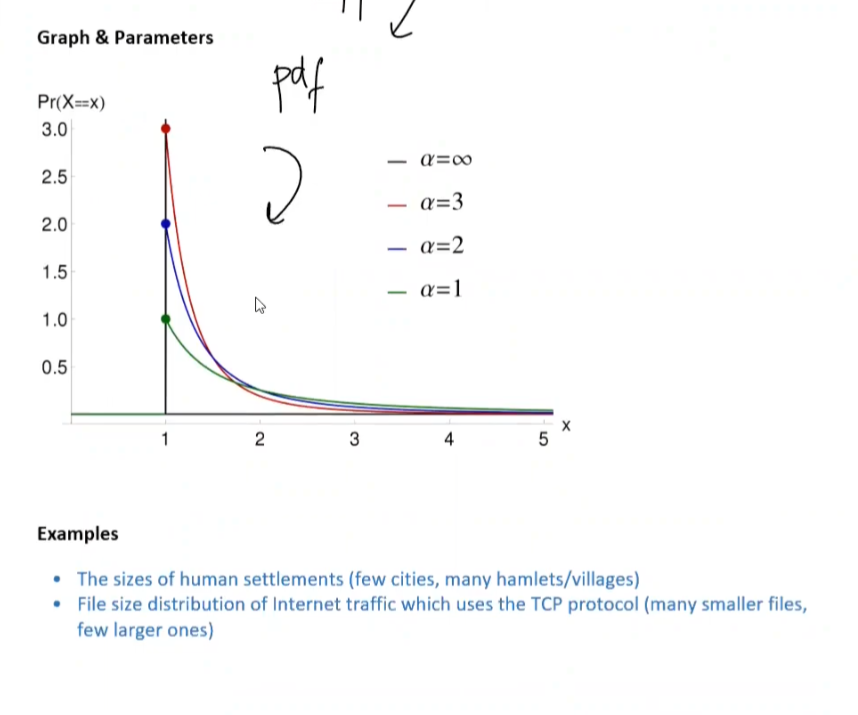
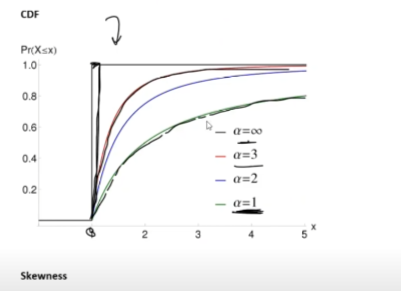

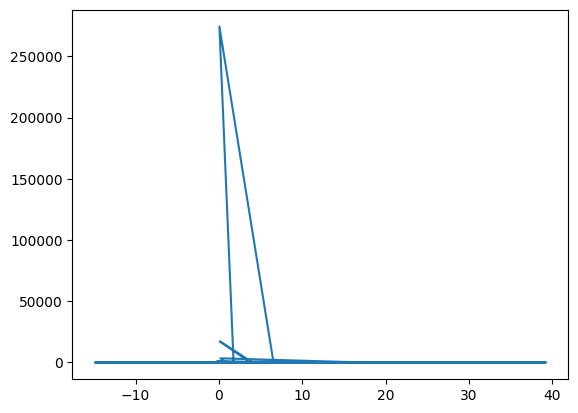

In [12]:
# How to know that the distribution is paresto distribution


alpha = 3
xm = 1
x = live_label_data['x'].reset_index(drop=True)
# Calculate the y values of the Pareto distribution
y = alpha * (xm**alpha) / (x**(alpha+1))
plt.plot(x,y)

c:\Users\BW_ML_1\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


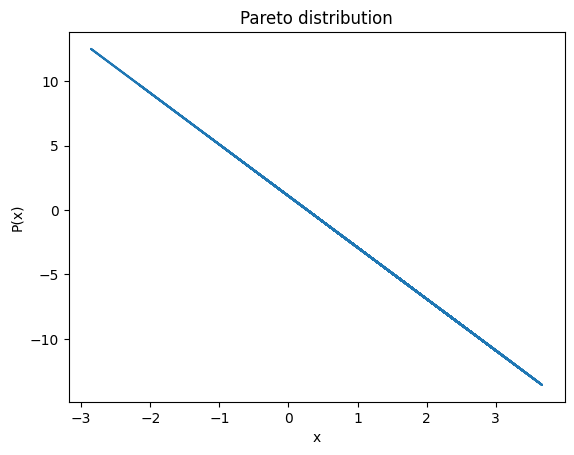

In [13]:
# Create the log-log plot
plt.plot(np.log(x),np.log(y))

# Add labels and a title
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('Pareto distribution')

# Show the plot
plt.show()

In [15]:
# from graph -2  show the your data follow the pareto distribution